In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('/content/sample_data/dataset.csv')

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.shape

(303, 14)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(303, 14)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_classifier_default = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_default.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = rf_classifier_default.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Default model performance:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Default model performance:
Accuracy: 0.8132, Precision: 0.8367, Recall: 0.8200, F1 Score: 0.8283


In [ ]:
feature_importances = rf_classifier_default.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = X.columns[sorted_indices[:5]]
top_importances = feature_importances[sorted_indices[:5]]
print("Top 5 Features:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

Top 5 Features:
ca: 0.13090504728224753
cp: 0.12691246565389042
thalach: 0.11480161716971192
oldpeak: 0.11172191350562372
thal: 0.10365730085500555


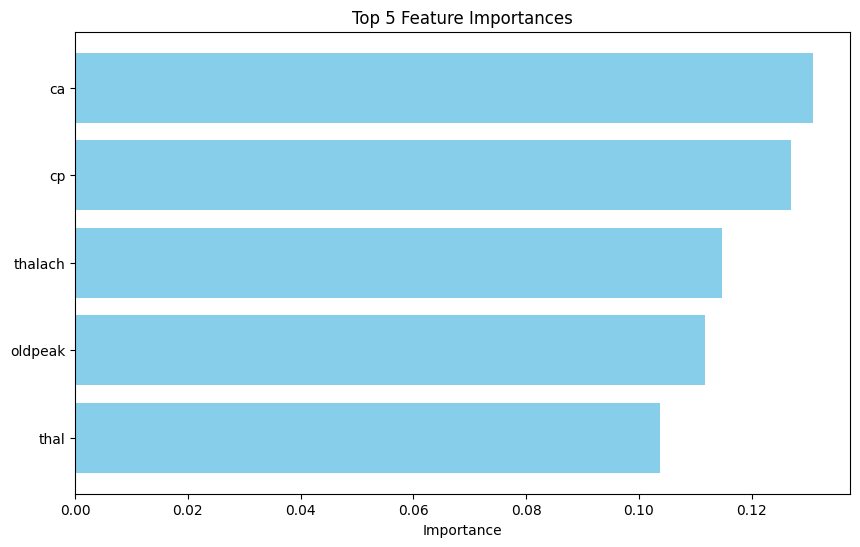

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier_default, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best hyperparameters found by grid search:", best_params)
print("Best cross-validation accuracy:", best_score)

Best hyperparameters found by grid search: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8440753045404208


In [ ]:
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
print("Tuned model performance:")
print(f"Accuracy: {accuracy_best:.4f}, Precision: {precision_best:.4f}, Recall: {recall_best:.4f}, F1 Score: {f1_best:.4f}")

Tuned model performance:
Accuracy: 0.8352, Precision: 0.8302, Recall: 0.8800, F1 Score: 0.8544


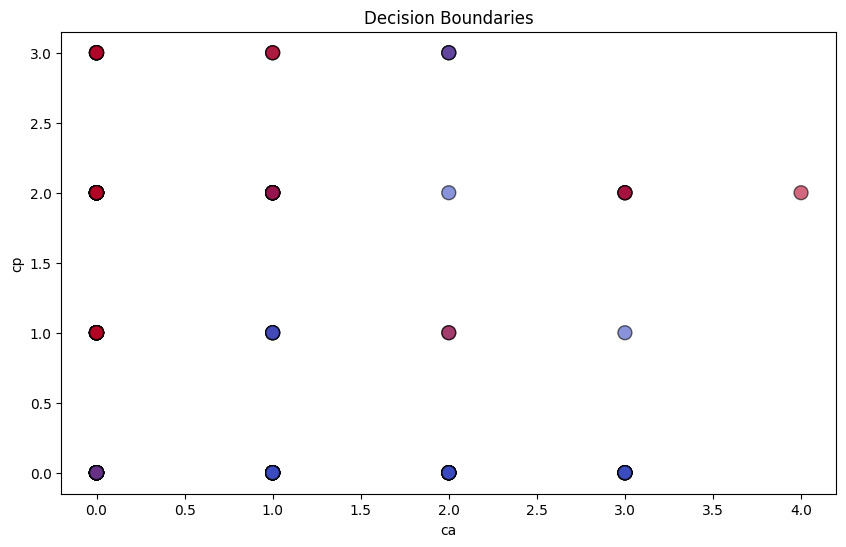

In [55]:
def plot_decision_boundaries(model, X, y, feature1, feature2):
    plt.figure(figsize=(10, 6))
    # Plot data points
    plt.scatter(X[feature1], X[feature2], c=y, cmap='coolwarm', edgecolors='k', s=100, alpha=0.6)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Boundaries')

    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.show()

try:
    plot_decision_boundaries(best_model, X_train, y_train, 'ca', 'cp')
except ValueError:
    pass